In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("data.csv")
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1470,Ford,Aspire,1995,regular unleaded,63.0,4.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,38,31,5657,2000
7881,Audi,Q7,2015,diesel,240.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Diesel",Large,4dr SUV,28,19,3105,59900
8932,Audi,S7,2015,premium unleaded (required),420.0,8.0,AUTOMATED_MANUAL,all wheel drive,4.0,"Factory Tuner,Luxury,High-Performance",Large,Sedan,27,17,3105,82500
4816,Suzuki,Forenza,2007,regular unleaded,127.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,28,19,481,16049
1306,Suzuki,Aerio,2005,regular unleaded,155.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,28,22,481,15649


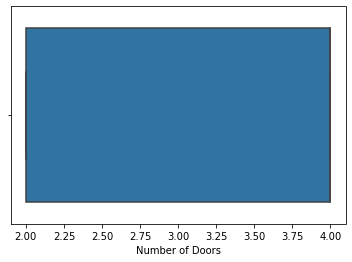

In [3]:
# No outliers
sns.boxplot(x=df['Number of Doors'])

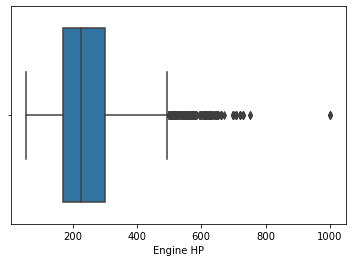

In [4]:
# Outliers
sns.boxplot(x=df['Engine HP'])

In [5]:
# Hard technique

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                    9.00
Engine HP             130.00
Engine Cylinders        2.00
Number of Doors         2.00
highway MPG             8.00
city mpg                6.00
Popularity           1460.00
MSRP                21231.25
dtype: float64


In [6]:
df.shape  

(11914, 16)

In [7]:
# Get the real rows
df2 = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(2830, 16)

In [11]:
# Get the opposite
df2 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
df2.shape

(11914, 16)


(9084, 16)

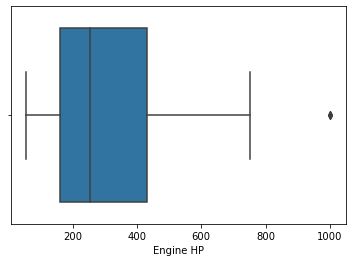

In [8]:
# Outliers After
sns.boxplot(x=df2['Engine HP'])